In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\practice\Customer churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


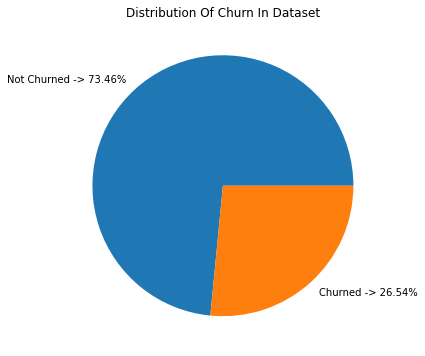

In [7]:
plt.figure(figsize=(6,6))
counts = [df['Churn'].value_counts().iloc[0], df['Churn'].value_counts().iloc[1]]
labels = ['Not Churned -> ' + str(round(counts[0]/df.shape[0]*100,2)) + '%', 'Churned -> ' + str(round(counts[1]/df.shape[0]*100,2)) + '%']
plt.pie(counts, labels=labels)
plt.title('Distribution Of Churn In Dataset')
plt.show()

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
churned_data = df[df['Churn'] == 'Yes'] 
not_churned_data = df[df['Churn'] == 'No'].sample(n=1869, random_state=300)
df = pd.concat([churned_data, not_churned_data])

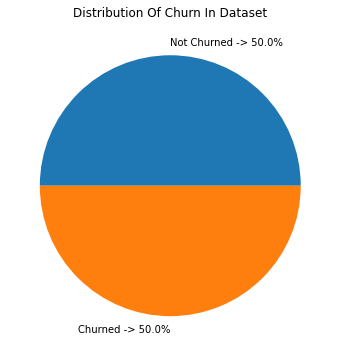

In [10]:
plt.figure(figsize=(6,6))
counts = [df['Churn'].value_counts().iloc[0], df['Churn'].value_counts().iloc[1]]
labels = ['Not Churned -> ' + str(round(counts[0]/df.shape[0]*100,2)) + '%', 'Churned -> ' + str(round(counts[1]/df.shape[0]*100,2)) + '%']
plt.pie(counts, labels=labels)
plt.title('Distribution Of Churn In Dataset')
plt.show()

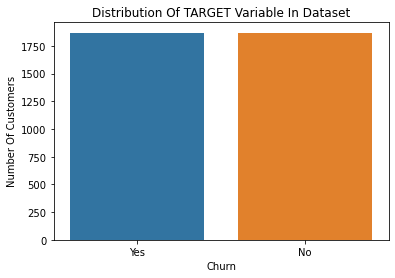

In [11]:
sns.countplot(df['Churn'])
plt.title('Distribution Of TARGET Variable In Dataset')
plt.xlabel('Churn')
plt.ylabel('Number Of Customers')
plt.show()

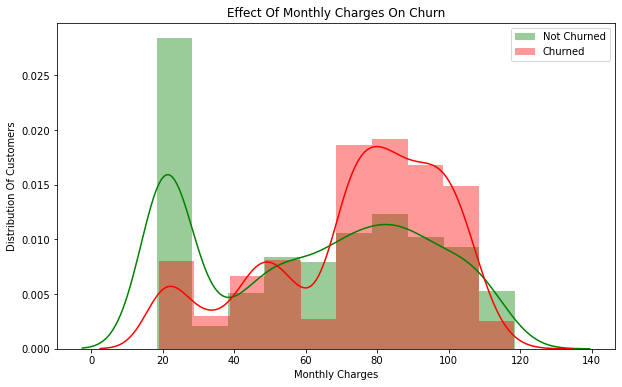

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'], hist=True, bins=10, label='Not Churned', color='green')
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'], hist=True, bins=10, label='Churned', color='red')
plt.title('Effect Of Monthly Charges On Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Distribution Of Customers')
plt.legend()
plt.show()

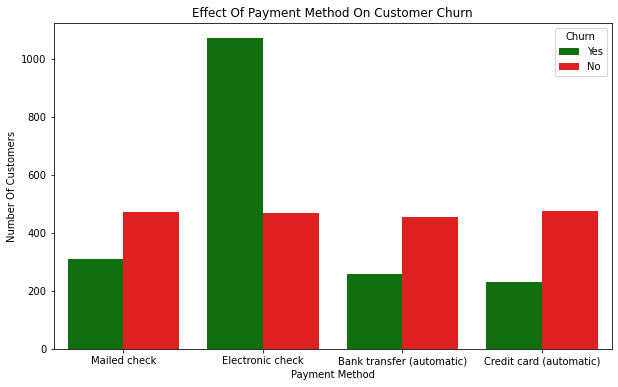

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['PaymentMethod'], hue=df['Churn'], palette=['green','red'])
plt.title('Effect Of Payment Method On Customer Churn')
plt.ylabel('Number Of Customers')
plt.xlabel('Payment Method')
plt.show()

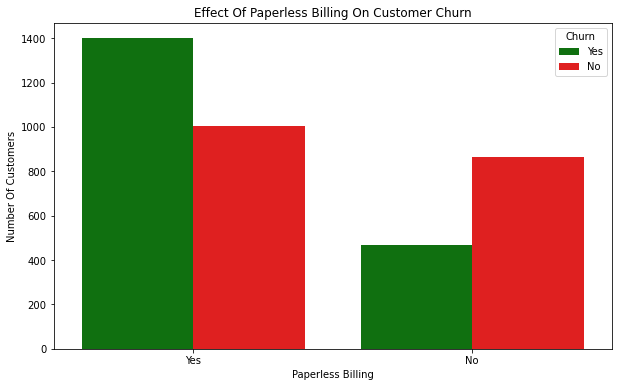

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df['PaperlessBilling'], hue=df['Churn'], palette=['green','red'])
plt.title('Effect Of Paperless Billing On Customer Churn')
plt.ylabel('Number Of Customers')
plt.xlabel('Paperless Billing')
plt.show()

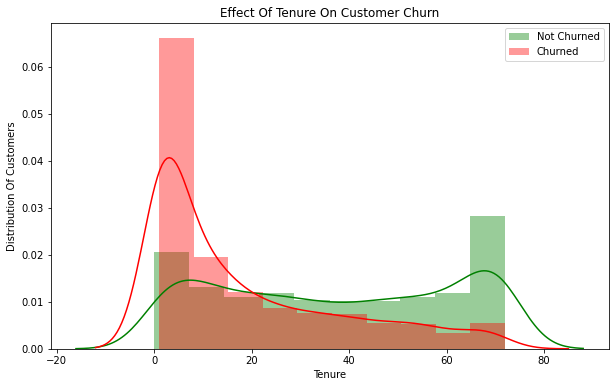

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Churn']=='No']['tenure'], hist=True, label='Not Churned', bins=10, color='green')
sns.distplot(df[df['Churn']=='Yes']['tenure'], hist=True, label='Churned', bins=10, color='red')
plt.legend()
plt.title('Effect Of Tenure On Customer Churn')
plt.xlabel('Tenure')
plt.ylabel('Distribution Of Customers')
plt.show()

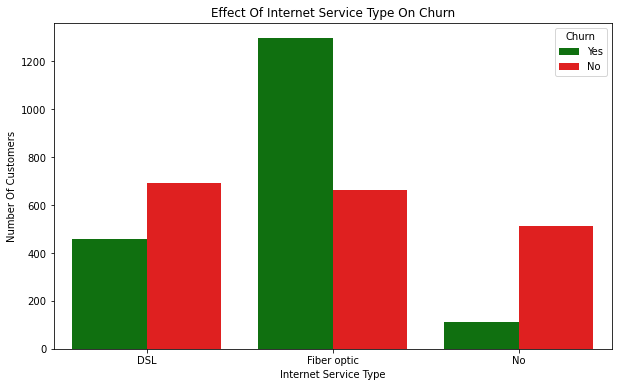

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['InternetService'], hue=df['Churn'], palette=['green','red'])
plt.title('Effect Of Internet Service Type On Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Number Of Customers')
plt.show()

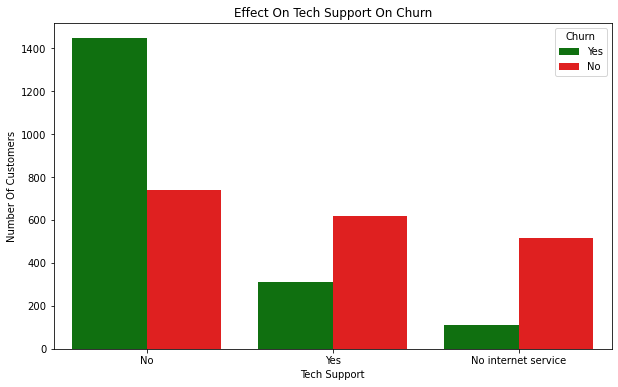

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['TechSupport'], hue=df['Churn'], palette=['green','red'])
plt.title('Effect On Tech Support On Churn')
plt.xlabel('Tech Support')
plt.ylabel('Number Of Customers')
plt.show()

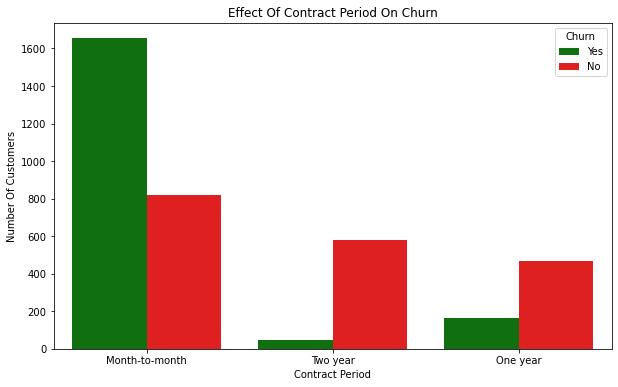

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['Contract'], hue=df['Churn'], palette=['green','red'])
plt.title('Effect Of Contract Period On Churn')
plt.xlabel('Contract Period')
plt.ylabel('Number Of Customers')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 2 to 3883
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3738 non-null   object 
 1   gender            3738 non-null   object 
 2   SeniorCitizen     3738 non-null   int64  
 3   Partner           3738 non-null   object 
 4   Dependents        3738 non-null   object 
 5   tenure            3738 non-null   int64  
 6   PhoneService      3738 non-null   object 
 7   MultipleLines     3738 non-null   object 
 8   InternetService   3738 non-null   object 
 9   OnlineSecurity    3738 non-null   object 
 10  OnlineBackup      3738 non-null   object 
 11  DeviceProtection  3738 non-null   object 
 12  TechSupport       3738 non-null   object 
 13  StreamingTV       3738 non-null   object 
 14  StreamingMovies   3738 non-null   object 
 15  Contract          3738 non-null   object 
 16  PaperlessBilling  3738 non-null   object 


In [27]:
col_names = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
 'TechSupport','StreamingMovies','StreamingTV','Contract','PaperlessBilling',
 'PaymentMethod']
df = pd.get_dummies(df, columns=col_names)

In [28]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,8,99.65,820.5,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
8,7892-POOKP,28,104.80,3046.05,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
13,0280-XJGEX,49,103.70,5036.3,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 2 to 3883
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               3738 non-null   object 
 1   tenure                                   3738 non-null   int64  
 2   MonthlyCharges                           3738 non-null   float64
 3   TotalCharges                             3738 non-null   object 
 4   Churn                                    3738 non-null   int32  
 5   gender_Female                            3738 non-null   uint8  
 6   gender_Male                              3738 non-null   uint8  
 7   SeniorCitizen_0                          3738 non-null   uint8  
 8   SeniorCitizen_1                          3738 non-null   uint8  
 9   Partner_No                               3738 non-null   uint8  
 10  Partner_Yes                              3738 no

In [30]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
df['Churn'] = label_bin.fit_transform(df['Churn'])

In [32]:
df.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

In [33]:
df.head()

,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,2,53.85,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,2,70.70,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,8,99.65,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
8,28,104.80,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
13,49,103.70,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


In [34]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=300)

In [36]:
print('Size of X_train : ' + str(X_train.shape))
print('Size of y_train : ' + str(y_train.shape))
print('Size of X_test : ' + str(X_test.shape))
print('Size of y_test : ' + str(y_test.shape))

Size of X_train : (3364, 45)
Size of y_train : (3364,)
Size of X_test : (374, 45)
Size of y_test : (374,)


In [ ]:
#Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
lg_f1_score = np.mean(cross_val_score(lg_classifier, X_train, y_train, scoring='f1', cv=5))

In [46]:
print('Logistic Regression F1-Score : ' + str(lg_f1_score))

Logistic Regression F1-Score : 0.7697852698689018


In [ ]:
#KNN CLassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_scores = []
n_val = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    acc_score = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    knn_scores.append(np.mean(acc_score))
    n_val.append(i)

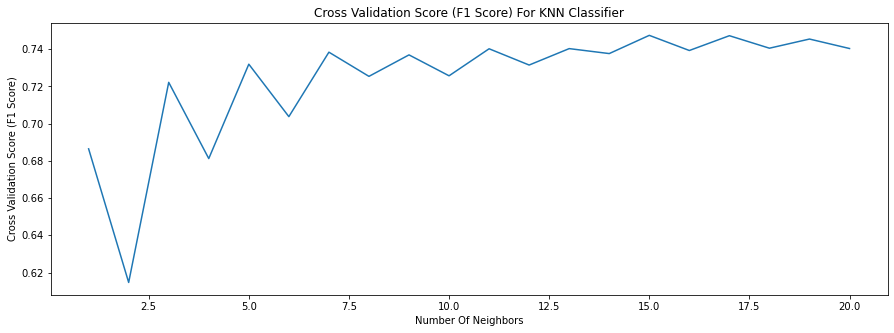

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(n_val,knn_scores)
plt.title('Cross Validation Score (F1 Score) For KNN Classifier')
plt.xlabel('Number Of Neighbors')
plt.ylabel('Cross Validation Score (F1 Score)')
plt.show()

In [39]:
print('Best F1 Score : ' + str(np.max(knn_scores)))
print('Best Neighbor Value : ' + str(n_val[knn_scores.index(np.max(knn_scores))]))

Best F1 Score : 0.7474526833906947
Best Neighbor Value : 15


In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=n_val[knn_scores.index(np.max(knn_scores))])
knn_classifier.fit(X_train, y_train)
knn_f1_score = np.mean(cross_val_score(knn_classifier, X_train, y_train, scoring='f1', cv=5))

In [41]:
#Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=300,max_depth=6,min_samples_leaf=4)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

In [43]:
print('Decison Tree Classifier F1-Score : ' + str(dt_f1_score))

Decison Tree Classifier F1-Score : 0.7506791465710467


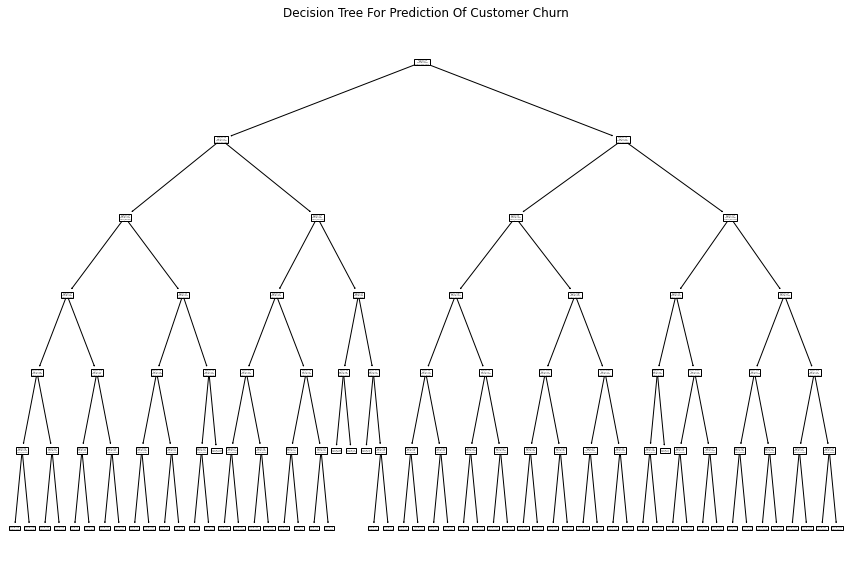

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Prediction Of Customer Churn')
plt.show()

In [47]:
#Model Evaluation

In [49]:
model_eval_df = pd.DataFrame(columns=['Model','Train F1 Score','Test F1 Score','Test Accuracy'])
df_index = 0

In [50]:
predictions = lg_classifier.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score
lg_test_f1_score = f1_score(y_test, predictions)
lg_test_acc_score = accuracy_score(y_test, predictions)


model_eval_df.loc[df_index] = ['Logistic Regression', lg_f1_score, lg_test_f1_score, lg_test_acc_score]
df_index = df_index + 1

In [51]:
predictions = knn_classifier.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score
knn_test_f1_score = f1_score(y_test, predictions)
knn_test_acc_score = accuracy_score(y_test, predictions)


model_eval_df.loc[df_index] = ['KNN', knn_f1_score, knn_test_f1_score, knn_test_acc_score]
df_index = df_index + 1

In [52]:
predictions = dt_classifier.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)


model_eval_df.loc[df_index] = ['Decision Tree', dt_f1_score, dt_test_f1_score, dt_test_acc_score]
df_index = df_index + 1

In [53]:
model_eval_df

,Model,Train F1 Score,Test F1 Score,Test Accuracy
0,Logistic Regression,0.769785,0.745407,0.740642
1,KNN,0.747453,0.706494,0.697861
2,Decision Tree,0.750679,0.719388,0.705882


In [54]:
predictions = lg_classifier.predict(X_test)

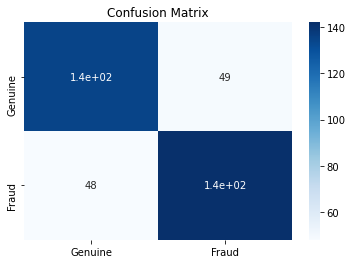

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, index=['Genuine','Fraud'], columns=['Genuine','Fraud'])
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       184
           1       0.74      0.75      0.75       190

    accuracy                           0.74       374
   macro avg       0.74      0.74      0.74       374
weighted avg       0.74      0.74      0.74       374

